In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_inceptionV3(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.applications.inception_v3.InceptionV3(
                weights="imagenet", include_top=False, input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.GlobalAveragePooling2D(),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(
                preprocessing_utils.num_classes, kernel_regularizer=keras.regularizers.l2(0.01), activation="softmax"
            ),
        ],
    )

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.summary()

    return model

In [7]:
inceptionV3_wrapper = ModelWrapper("InceptionV3", preprocessing_utils=preprocessing_utils)

In [8]:
inceptionV3_wrapper.build_model(build_fn=build_inceptionV3, model_name=inceptionV3_wrapper.model_name)

Building model...
Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 22,068,281
Trainable params: 22,033,849
Non-trainable params: 34,432
____________________

In [9]:
inceptionV3_wrapper.train_and_save_model(batch_size=32)

Epoch 1/100
129/129 [==============================] - ETA: 0s - loss: 3.6436 - accuracy: 0.0640
Epoch 1: val_loss improved from inf to 3.52900, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 31s 189ms/step - loss: 3.6436 - accuracy: 0.0640 - val_loss: 3.5290 - val_accuracy: 0.0829 - lr: 1.0000e-04
Epoch 2/100
128/129 [============================>.] - ETA: 0s - loss: 3.4986 - accuracy: 0.1082
Epoch 2: val_loss improved from 3.52900 to 3.41657, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 3.4978 - accuracy: 0.1092 - val_loss: 3.4166 - val_accuracy: 0.1567 - lr: 1.0000e-04
Epoch 3/100
129/129 [==============================] - ETA: 0s - loss: 3.3673 - accuracy: 0.1657
Epoch 3: val_loss improved from 3.41657 to 3.32118, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 3.3673 - accuracy: 0.1657 - val_loss: 3.3212 - val_accuracy: 0.2166 - lr: 1.0000e-04
Epoch 4/100
129/129 [==============================] - ETA: 0s - loss: 3.2170 - accuracy: 0.2330
Epoch 4: val_loss improved from 3.32118 to 3.20430, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 3.2170 - accuracy: 0.2330 - val_loss: 3.2043 - val_accuracy: 0.2488 - lr: 1.0000e-04
Epoch 5/100
128/129 [============================>.] - ETA: 0s - loss: 3.0562 - accuracy: 0.2986
Epoch 5: val_loss improved from 3.20430 to 3.06955, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 29s 226ms/step - loss: 3.0557 - accuracy: 0.2990 - val_loss: 3.0696 - val_accuracy: 0.3088 - lr: 1.0000e-04
Epoch 6/100
128/129 [============================>.] - ETA: 0s - loss: 2.8894 - accuracy: 0.3445
Epoch 6: val_loss improved from 3.06955 to 2.92656, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 2.8893 - accuracy: 0.3447 - val_loss: 2.9266 - val_accuracy: 0.3364 - lr: 1.0000e-04
Epoch 7/100
128/129 [============================>.] - ETA: 0s - loss: 2.7146 - accuracy: 0.4043
Epoch 7: val_loss improved from 2.92656 to 2.78812, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 182ms/step - loss: 2.7151 - accuracy: 0.4040 - val_loss: 2.7881 - val_accuracy: 0.3733 - lr: 1.0000e-04
Epoch 8/100
128/129 [============================>.] - ETA: 0s - loss: 2.5678 - accuracy: 0.4380
Epoch 8: val_loss improved from 2.78812 to 2.65955, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 2.5676 - accuracy: 0.4383 - val_loss: 2.6596 - val_accuracy: 0.4009 - lr: 1.0000e-04
Epoch 9/100
128/129 [============================>.] - ETA: 0s - loss: 2.4079 - accuracy: 0.4863
Epoch 9: val_loss improved from 2.65955 to 2.52836, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 25s 189ms/step - loss: 2.4076 - accuracy: 0.4867 - val_loss: 2.5284 - val_accuracy: 0.4470 - lr: 1.0000e-04
Epoch 10/100
128/129 [============================>.] - ETA: 0s - loss: 2.2516 - accuracy: 0.5381
Epoch 10: val_loss improved from 2.52836 to 2.41718, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 2.2520 - accuracy: 0.5378 - val_loss: 2.4172 - val_accuracy: 0.4654 - lr: 1.0000e-04
Epoch 11/100
128/129 [============================>.] - ETA: 0s - loss: 2.1229 - accuracy: 0.5713
Epoch 11: val_loss improved from 2.41718 to 2.31250, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 2.1231 - accuracy: 0.5714 - val_loss: 2.3125 - val_accuracy: 0.5253 - lr: 1.0000e-04
Epoch 12/100
128/129 [============================>.] - ETA: 0s - loss: 1.9898 - accuracy: 0.6155
Epoch 12: val_loss improved from 2.31250 to 2.21393, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 1.9891 - accuracy: 0.6166 - val_loss: 2.2139 - val_accuracy: 0.5346 - lr: 1.0000e-04
Epoch 13/100
128/129 [============================>.] - ETA: 0s - loss: 1.8844 - accuracy: 0.6455
Epoch 13: val_loss improved from 2.21393 to 2.12670, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 1.8852 - accuracy: 0.6453 - val_loss: 2.1267 - val_accuracy: 0.5392 - lr: 1.0000e-04
Epoch 14/100
128/129 [============================>.] - ETA: 0s - loss: 1.7615 - accuracy: 0.6885
Epoch 14: val_loss improved from 2.12670 to 2.04933, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 1.7614 - accuracy: 0.6886 - val_loss: 2.0493 - val_accuracy: 0.5438 - lr: 1.0000e-04
Epoch 15/100
128/129 [============================>.] - ETA: 0s - loss: 1.6623 - accuracy: 0.7090
Epoch 15: val_loss improved from 2.04933 to 1.98315, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 1.6629 - accuracy: 0.7091 - val_loss: 1.9832 - val_accuracy: 0.5622 - lr: 1.0000e-04
Epoch 16/100
129/129 [==============================] - ETA: 0s - loss: 1.5531 - accuracy: 0.7426
Epoch 16: val_loss improved from 1.98315 to 1.91338, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 288ms/step - loss: 1.5531 - accuracy: 0.7426 - val_loss: 1.9134 - val_accuracy: 0.5991 - lr: 1.0000e-04
Epoch 17/100
129/129 [==============================] - ETA: 0s - loss: 1.4788 - accuracy: 0.7558
Epoch 17: val_loss improved from 1.91338 to 1.85244, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 294ms/step - loss: 1.4788 - accuracy: 0.7558 - val_loss: 1.8524 - val_accuracy: 0.5853 - lr: 1.0000e-04
Epoch 18/100
129/129 [==============================] - ETA: 0s - loss: 1.3809 - accuracy: 0.7913
Epoch 18: val_loss improved from 1.85244 to 1.80115, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 293ms/step - loss: 1.3809 - accuracy: 0.7913 - val_loss: 1.8011 - val_accuracy: 0.5945 - lr: 1.0000e-04
Epoch 19/100
129/129 [==============================] - ETA: 0s - loss: 1.2996 - accuracy: 0.8159
Epoch 19: val_loss improved from 1.80115 to 1.75360, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 289ms/step - loss: 1.2996 - accuracy: 0.8159 - val_loss: 1.7536 - val_accuracy: 0.6175 - lr: 1.0000e-04
Epoch 20/100
129/129 [==============================] - ETA: 0s - loss: 1.2289 - accuracy: 0.8280
Epoch 20: val_loss improved from 1.75360 to 1.70631, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 292ms/step - loss: 1.2289 - accuracy: 0.8280 - val_loss: 1.7063 - val_accuracy: 0.6175 - lr: 1.0000e-04
Epoch 21/100
129/129 [==============================] - ETA: 0s - loss: 1.1538 - accuracy: 0.8514
Epoch 21: val_loss improved from 1.70631 to 1.66335, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 1.1538 - accuracy: 0.8514 - val_loss: 1.6633 - val_accuracy: 0.6221 - lr: 1.0000e-04
Epoch 22/100
129/129 [==============================] - ETA: 0s - loss: 1.1041 - accuracy: 0.8674
Epoch 22: val_loss improved from 1.66335 to 1.62770, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 1.1041 - accuracy: 0.8674 - val_loss: 1.6277 - val_accuracy: 0.6498 - lr: 1.0000e-04
Epoch 23/100
129/129 [==============================] - ETA: 0s - loss: 1.0488 - accuracy: 0.8779
Epoch 23: val_loss improved from 1.62770 to 1.59351, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 291ms/step - loss: 1.0488 - accuracy: 0.8779 - val_loss: 1.5935 - val_accuracy: 0.6498 - lr: 1.0000e-04
Epoch 24/100
129/129 [==============================] - ETA: 0s - loss: 1.0009 - accuracy: 0.8849
Epoch 24: val_loss improved from 1.59351 to 1.56746, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 35s 269ms/step - loss: 1.0009 - accuracy: 0.8849 - val_loss: 1.5675 - val_accuracy: 0.6544 - lr: 1.0000e-04
Epoch 25/100
128/129 [============================>.] - ETA: 0s - loss: 0.9491 - accuracy: 0.9072
Epoch 25: val_loss improved from 1.56746 to 1.54272, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.9492 - accuracy: 0.9073 - val_loss: 1.5427 - val_accuracy: 0.6452 - lr: 1.0000e-04
Epoch 26/100
128/129 [============================>.] - ETA: 0s - loss: 0.9165 - accuracy: 0.9104
Epoch 26: val_loss improved from 1.54272 to 1.51928, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 181ms/step - loss: 0.9170 - accuracy: 0.9105 - val_loss: 1.5193 - val_accuracy: 0.6636 - lr: 1.0000e-04
Epoch 27/100
128/129 [============================>.] - ETA: 0s - loss: 0.8740 - accuracy: 0.9221
Epoch 27: val_loss improved from 1.51928 to 1.50227, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 23s 182ms/step - loss: 0.8740 - accuracy: 0.9217 - val_loss: 1.5023 - val_accuracy: 0.6636 - lr: 1.0000e-04
Epoch 28/100
128/129 [============================>.] - ETA: 0s - loss: 0.8349 - accuracy: 0.9309
Epoch 28: val_loss improved from 1.50227 to 1.48421, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.8356 - accuracy: 0.9309 - val_loss: 1.4842 - val_accuracy: 0.6682 - lr: 1.0000e-04
Epoch 29/100
128/129 [============================>.] - ETA: 0s - loss: 0.8086 - accuracy: 0.9382
Epoch 29: val_loss improved from 1.48421 to 1.46814, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 189ms/step - loss: 0.8089 - accuracy: 0.9380 - val_loss: 1.4681 - val_accuracy: 0.6866 - lr: 1.0000e-04
Epoch 30/100
128/129 [============================>.] - ETA: 0s - loss: 0.7579 - accuracy: 0.9500
Epoch 30: val_loss improved from 1.46814 to 1.45414, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.7585 - accuracy: 0.9496 - val_loss: 1.4541 - val_accuracy: 0.6682 - lr: 1.0000e-04
Epoch 31/100
128/129 [============================>.] - ETA: 0s - loss: 0.7411 - accuracy: 0.9495
Epoch 31: val_loss improved from 1.45414 to 1.43887, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.7419 - accuracy: 0.9489 - val_loss: 1.4389 - val_accuracy: 0.6774 - lr: 1.0000e-04
Epoch 32/100
128/129 [============================>.] - ETA: 0s - loss: 0.7200 - accuracy: 0.9600
Epoch 32: val_loss improved from 1.43887 to 1.42695, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.7204 - accuracy: 0.9596 - val_loss: 1.4269 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 33/100
128/129 [============================>.] - ETA: 0s - loss: 0.7043 - accuracy: 0.9600
Epoch 33: val_loss improved from 1.42695 to 1.41430, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 182ms/step - loss: 0.7053 - accuracy: 0.9599 - val_loss: 1.4143 - val_accuracy: 0.6866 - lr: 1.0000e-04
Epoch 34/100
128/129 [============================>.] - ETA: 0s - loss: 0.6760 - accuracy: 0.9634
Epoch 34: val_loss improved from 1.41430 to 1.41098, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.6759 - accuracy: 0.9635 - val_loss: 1.4110 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 35/100
128/129 [============================>.] - ETA: 0s - loss: 0.6590 - accuracy: 0.9670
Epoch 35: val_loss improved from 1.41098 to 1.39833, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.6600 - accuracy: 0.9669 - val_loss: 1.3983 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 36/100
128/129 [============================>.] - ETA: 0s - loss: 0.6395 - accuracy: 0.9751
Epoch 36: val_loss improved from 1.39833 to 1.39250, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.6392 - accuracy: 0.9752 - val_loss: 1.3925 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 37/100
128/129 [============================>.] - ETA: 0s - loss: 0.6239 - accuracy: 0.9722
Epoch 37: val_loss improved from 1.39250 to 1.38252, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.6243 - accuracy: 0.9723 - val_loss: 1.3825 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 38/100
128/129 [============================>.] - ETA: 0s - loss: 0.6080 - accuracy: 0.9763
Epoch 38: val_loss improved from 1.38252 to 1.37338, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.6086 - accuracy: 0.9759 - val_loss: 1.3734 - val_accuracy: 0.7051 - lr: 1.0000e-04
Epoch 39/100
128/129 [============================>.] - ETA: 0s - loss: 0.5911 - accuracy: 0.9812
Epoch 39: val_loss improved from 1.37338 to 1.36497, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.5916 - accuracy: 0.9813 - val_loss: 1.3650 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 40/100
128/129 [============================>.] - ETA: 0s - loss: 0.5859 - accuracy: 0.9824
Epoch 40: val_loss improved from 1.36497 to 1.36355, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.5865 - accuracy: 0.9822 - val_loss: 1.3636 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 41/100
128/129 [============================>.] - ETA: 0s - loss: 0.5760 - accuracy: 0.9836
Epoch 41: val_loss improved from 1.36355 to 1.35412, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.5761 - accuracy: 0.9837 - val_loss: 1.3541 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 42/100
128/129 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.9890
Epoch 42: val_loss improved from 1.35412 to 1.34800, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.5550 - accuracy: 0.9891 - val_loss: 1.3480 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 43/100
128/129 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.9878
Epoch 43: val_loss improved from 1.34800 to 1.34744, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.5530 - accuracy: 0.9876 - val_loss: 1.3474 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 44/100
128/129 [============================>.] - ETA: 0s - loss: 0.5434 - accuracy: 0.9846
Epoch 44: val_loss improved from 1.34744 to 1.34209, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.5432 - accuracy: 0.9847 - val_loss: 1.3421 - val_accuracy: 0.7051 - lr: 1.0000e-04
Epoch 45/100
128/129 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.9915
Epoch 45: val_loss improved from 1.34209 to 1.34032, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.5322 - accuracy: 0.9915 - val_loss: 1.3403 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 46/100
128/129 [============================>.] - ETA: 0s - loss: 0.5228 - accuracy: 0.9949
Epoch 46: val_loss improved from 1.34032 to 1.33580, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.5230 - accuracy: 0.9949 - val_loss: 1.3358 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 47/100
128/129 [============================>.] - ETA: 0s - loss: 0.5193 - accuracy: 0.9905
Epoch 47: val_loss improved from 1.33580 to 1.32953, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.5199 - accuracy: 0.9905 - val_loss: 1.3295 - val_accuracy: 0.6959 - lr: 1.0000e-04
Epoch 48/100
128/129 [============================>.] - ETA: 0s - loss: 0.5125 - accuracy: 0.9924
Epoch 48: val_loss improved from 1.32953 to 1.32503, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.5124 - accuracy: 0.9925 - val_loss: 1.3250 - val_accuracy: 0.7051 - lr: 1.0000e-04
Epoch 49/100
128/129 [============================>.] - ETA: 0s - loss: 0.5019 - accuracy: 0.9932
Epoch 49: val_loss did not improve from 1.32503
129/129 [==============================] - 9s 68ms/step - loss: 0.5026 - accuracy: 0.9932 - val_loss: 1.3254 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 50/100
128/129 [============================>.] - ETA: 0s - loss: 0.5032 - accuracy: 0.9917
Epoch 50: val_loss improved from 1.32503 to 1.31850, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.5037 - accuracy: 0.9917 - val_loss: 1.3185 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 51/100
128/129 [============================>.] - ETA: 0s - loss: 0.4926 - accuracy: 0.9934
Epoch 51: val_loss improved from 1.31850 to 1.31572, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4936 - accuracy: 0.9929 - val_loss: 1.3157 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 52/100
128/129 [============================>.] - ETA: 0s - loss: 0.4853 - accuracy: 0.9951
Epoch 52: val_loss improved from 1.31572 to 1.31314, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4859 - accuracy: 0.9951 - val_loss: 1.3131 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 53/100
128/129 [============================>.] - ETA: 0s - loss: 0.4847 - accuracy: 0.9941
Epoch 53: val_loss improved from 1.31314 to 1.30636, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 0.4853 - accuracy: 0.9939 - val_loss: 1.3064 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 54/100
128/129 [============================>.] - ETA: 0s - loss: 0.4826 - accuracy: 0.9954
Epoch 54: val_loss did not improve from 1.30636
129/129 [==============================] - 9s 69ms/step - loss: 0.4832 - accuracy: 0.9951 - val_loss: 1.3089 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 55/100
128/129 [============================>.] - ETA: 0s - loss: 0.4702 - accuracy: 0.9978
Epoch 55: val_loss improved from 1.30636 to 1.30554, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4712 - accuracy: 0.9973 - val_loss: 1.3055 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 56/100
128/129 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.9958
Epoch 56: val_loss improved from 1.30554 to 1.30184, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4680 - accuracy: 0.9956 - val_loss: 1.3018 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 57/100
128/129 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.9966
Epoch 57: val_loss improved from 1.30184 to 1.30165, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.4620 - accuracy: 0.9966 - val_loss: 1.3016 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 58/100
128/129 [============================>.] - ETA: 0s - loss: 0.4580 - accuracy: 0.9980
Epoch 58: val_loss improved from 1.30165 to 1.30020, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 0.4587 - accuracy: 0.9978 - val_loss: 1.3002 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 59/100
128/129 [============================>.] - ETA: 0s - loss: 0.4565 - accuracy: 0.9961
Epoch 59: val_loss improved from 1.30020 to 1.29987, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.4576 - accuracy: 0.9961 - val_loss: 1.2999 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 60/100
128/129 [============================>.] - ETA: 0s - loss: 0.4518 - accuracy: 0.9958
Epoch 60: val_loss did not improve from 1.29987
129/129 [==============================] - 9s 68ms/step - loss: 0.4526 - accuracy: 0.9956 - val_loss: 1.3009 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 61/100
128/129 [============================>.] - ETA: 0s - loss: 0.4499 - accuracy: 0.9958
Epoch 61: val_loss improved from 1.29987 to 1.29658, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4502 - accuracy: 0.9959 - val_loss: 1.2966 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 62/100
128/129 [============================>.] - ETA: 0s - loss: 0.4457 - accuracy: 0.9983
Epoch 62: val_loss improved from 1.29658 to 1.29173, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4457 - accuracy: 0.9983 - val_loss: 1.2917 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 63/100
128/129 [============================>.] - ETA: 0s - loss: 0.4385 - accuracy: 0.9985
Epoch 63: val_loss improved from 1.29173 to 1.29135, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4386 - accuracy: 0.9985 - val_loss: 1.2913 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 64/100
128/129 [============================>.] - ETA: 0s - loss: 0.4349 - accuracy: 0.9985
Epoch 64: val_loss improved from 1.29135 to 1.28981, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4353 - accuracy: 0.9985 - val_loss: 1.2898 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 65/100
128/129 [============================>.] - ETA: 0s - loss: 0.4333 - accuracy: 0.9976
Epoch 65: val_loss did not improve from 1.28981
129/129 [==============================] - 9s 68ms/step - loss: 0.4335 - accuracy: 0.9976 - val_loss: 1.2904 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 66/100
128/129 [============================>.] - ETA: 0s - loss: 0.4272 - accuracy: 0.9983
Epoch 66: val_loss improved from 1.28981 to 1.28031, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.4273 - accuracy: 0.9983 - val_loss: 1.2803 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 67/100
128/129 [============================>.] - ETA: 0s - loss: 0.4286 - accuracy: 0.9980
Epoch 67: val_loss did not improve from 1.28031
129/129 [==============================] - 9s 68ms/step - loss: 0.4288 - accuracy: 0.9981 - val_loss: 1.2804 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 68/100
128/129 [============================>.] - ETA: 0s - loss: 0.4232 - accuracy: 0.9980
Epoch 68: val_loss improved from 1.28031 to 1.27980, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.4232 - accuracy: 0.9981 - val_loss: 1.2798 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 69/100
128/129 [============================>.] - ETA: 0s - loss: 0.4192 - accuracy: 0.9980
Epoch 69: val_loss did not improve from 1.27980
129/129 [==============================] - 9s 68ms/step - loss: 0.4196 - accuracy: 0.9978 - val_loss: 1.2807 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 70/100
128/129 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.9971
Epoch 70: val_loss improved from 1.27980 to 1.27859, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 23s 183ms/step - loss: 0.4183 - accuracy: 0.9971 - val_loss: 1.2786 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 71/100
128/129 [============================>.] - ETA: 0s - loss: 0.4162 - accuracy: 0.9976
Epoch 71: val_loss improved from 1.27859 to 1.27065, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4167 - accuracy: 0.9973 - val_loss: 1.2707 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 72/100
128/129 [============================>.] - ETA: 0s - loss: 0.4153 - accuracy: 0.9983
Epoch 72: val_loss improved from 1.27065 to 1.26950, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.4157 - accuracy: 0.9983 - val_loss: 1.2695 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 73/100
128/129 [============================>.] - ETA: 0s - loss: 0.4124 - accuracy: 0.9980
Epoch 73: val_loss improved from 1.26950 to 1.26708, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4127 - accuracy: 0.9981 - val_loss: 1.2671 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 74/100
128/129 [============================>.] - ETA: 0s - loss: 0.4088 - accuracy: 0.9983
Epoch 74: val_loss improved from 1.26708 to 1.26657, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4089 - accuracy: 0.9983 - val_loss: 1.2666 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 75/100
128/129 [============================>.] - ETA: 0s - loss: 0.4078 - accuracy: 0.9978
Epoch 75: val_loss improved from 1.26657 to 1.26181, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.4081 - accuracy: 0.9978 - val_loss: 1.2618 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 76/100
128/129 [============================>.] - ETA: 0s - loss: 0.4046 - accuracy: 0.9990
Epoch 76: val_loss improved from 1.26181 to 1.25818, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.4047 - accuracy: 0.9990 - val_loss: 1.2582 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 77/100
128/129 [============================>.] - ETA: 0s - loss: 0.4019 - accuracy: 0.9978
Epoch 77: val_loss improved from 1.25818 to 1.25460, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 0.4020 - accuracy: 0.9978 - val_loss: 1.2546 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 78/100
128/129 [============================>.] - ETA: 0s - loss: 0.4004 - accuracy: 0.9988
Epoch 78: val_loss did not improve from 1.25460
129/129 [==============================] - 9s 68ms/step - loss: 0.4005 - accuracy: 0.9988 - val_loss: 1.2568 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 79/100
128/129 [============================>.] - ETA: 0s - loss: 0.3996 - accuracy: 0.9993
Epoch 79: val_loss did not improve from 1.25460
129/129 [==============================] - 9s 67ms/step - loss: 0.4002 - accuracy: 0.9993 - val_loss: 1.2566 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 80/100
128/129 [============================>.] - ETA: 0s - loss: 0.3908 - accuracy: 0.9995
Epoch 80: val_loss did not improve from 1.25460
129/129 [==============================] - 9s 67ms/step - loss: 0.3909 - accuracy: 0.9995 - val_loss: 1.2547 - va

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.3932 - accuracy: 0.9983 - val_loss: 1.2518 - val_accuracy: 0.7189 - lr: 5.0000e-05
Epoch 83/100
128/129 [============================>.] - ETA: 0s - loss: 0.3927 - accuracy: 0.9978
Epoch 83: val_loss did not improve from 1.25181
129/129 [==============================] - 9s 68ms/step - loss: 0.3930 - accuracy: 0.9976 - val_loss: 1.2541 - val_accuracy: 0.7189 - lr: 5.0000e-05
Epoch 84/100
128/129 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.9990
Epoch 84: val_loss improved from 1.25181 to 1.25068, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.3883 - accuracy: 0.9990 - val_loss: 1.2507 - val_accuracy: 0.7235 - lr: 5.0000e-05
Epoch 85/100
128/129 [============================>.] - ETA: 0s - loss: 0.3872 - accuracy: 0.9998
Epoch 85: val_loss improved from 1.25068 to 1.25013, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.3881 - accuracy: 0.9998 - val_loss: 1.2501 - val_accuracy: 0.7235 - lr: 5.0000e-05
Epoch 86/100
128/129 [============================>.] - ETA: 0s - loss: 0.3876 - accuracy: 0.9990
Epoch 86: val_loss improved from 1.25013 to 1.24739, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.3880 - accuracy: 0.9990 - val_loss: 1.2474 - val_accuracy: 0.7235 - lr: 5.0000e-05
Epoch 87/100
128/129 [============================>.] - ETA: 0s - loss: 0.3864 - accuracy: 0.9980
Epoch 87: val_loss improved from 1.24739 to 1.24651, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 0.3866 - accuracy: 0.9981 - val_loss: 1.2465 - val_accuracy: 0.7281 - lr: 5.0000e-05
Epoch 88/100
128/129 [============================>.] - ETA: 0s - loss: 0.3850 - accuracy: 0.9985
Epoch 88: val_loss improved from 1.24651 to 1.24619, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 279ms/step - loss: 0.3852 - accuracy: 0.9985 - val_loss: 1.2462 - val_accuracy: 0.7143 - lr: 5.0000e-05
Epoch 89/100
129/129 [==============================] - ETA: 0s - loss: 0.3856 - accuracy: 0.9981
Epoch 89: val_loss did not improve from 1.24619
129/129 [==============================] - 12s 90ms/step - loss: 0.3856 - accuracy: 0.9981 - val_loss: 1.2478 - val_accuracy: 0.7281 - lr: 5.0000e-05
Epoch 90/100
129/129 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.9983
Epoch 90: val_loss improved from 1.24619 to 1.24560, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.3825 - accuracy: 0.9983 - val_loss: 1.2456 - val_accuracy: 0.7281 - lr: 5.0000e-05
Epoch 91/100
129/129 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.9993
Epoch 91: val_loss improved from 1.24560 to 1.24432, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 34s 263ms/step - loss: 0.3825 - accuracy: 0.9993 - val_loss: 1.2443 - val_accuracy: 0.7235 - lr: 5.0000e-05
Epoch 92/100
128/129 [============================>.] - ETA: 0s - loss: 0.3839 - accuracy: 0.9985
Epoch 92: val_loss improved from 1.24432 to 1.24055, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 182ms/step - loss: 0.3839 - accuracy: 0.9985 - val_loss: 1.2406 - val_accuracy: 0.7235 - lr: 5.0000e-05
Epoch 93/100
128/129 [============================>.] - ETA: 0s - loss: 0.3840 - accuracy: 0.9983
Epoch 93: val_loss did not improve from 1.24055
129/129 [==============================] - 9s 66ms/step - loss: 0.3845 - accuracy: 0.9981 - val_loss: 1.2437 - val_accuracy: 0.7235 - lr: 5.0000e-05
Epoch 94/100
128/129 [============================>.] - ETA: 0s - loss: 0.3783 - accuracy: 0.9993
Epoch 94: val_loss did not improve from 1.24055
129/129 [==============================] - 9s 66ms/step - loss: 0.3785 - accuracy: 0.9993 - val_loss: 1.2418 - val_accuracy: 0.7281 - lr: 5.0000e-05
Epoch 95/100
128/129 [============================>.] - ETA: 0s - loss: 0.3798 - accuracy: 0.9990
Epoch 95: val_loss improved from 1.24055 to 1.23848, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 23s 182ms/step - loss: 0.3799 - accuracy: 0.9990 - val_loss: 1.2385 - val_accuracy: 0.7281 - lr: 5.0000e-05
Epoch 96/100
128/129 [============================>.] - ETA: 0s - loss: 0.3792 - accuracy: 0.9988
Epoch 96: val_loss did not improve from 1.23848
129/129 [==============================] - 9s 67ms/step - loss: 0.3794 - accuracy: 0.9988 - val_loss: 1.2409 - val_accuracy: 0.7281 - lr: 5.0000e-05
Epoch 97/100
128/129 [============================>.] - ETA: 0s - loss: 0.3745 - accuracy: 0.9998
Epoch 97: val_loss did not improve from 1.23848
129/129 [==============================] - 9s 67ms/step - loss: 0.3759 - accuracy: 0.9995 - val_loss: 1.2398 - val_accuracy: 0.7281 - lr: 5.0000e-05
Epoch 98/100
128/129 [============================>.] - ETA: 0s - loss: 0.3765 - accuracy: 0.9990
Epoch 98: val_loss improved from 1.23848 to 1.23696, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 23s 183ms/step - loss: 0.3767 - accuracy: 0.9990 - val_loss: 1.2370 - val_accuracy: 0.7281 - lr: 5.0000e-05
Epoch 99/100
128/129 [============================>.] - ETA: 0s - loss: 0.3766 - accuracy: 0.9983
Epoch 99: val_loss improved from 1.23696 to 1.23673, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 182ms/step - loss: 0.3766 - accuracy: 0.9983 - val_loss: 1.2367 - val_accuracy: 0.7235 - lr: 5.0000e-05
Epoch 100/100
128/129 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.9993
Epoch 100: val_loss did not improve from 1.23673
129/129 [==============================] - 9s 66ms/step - loss: 0.3750 - accuracy: 0.9993 - val_loss: 1.2380 - val_accuracy: 0.7281 - lr: 5.0000e-05
Saving model to "artifacts/models/InceptionV3.h5"...
Model saved successfully!


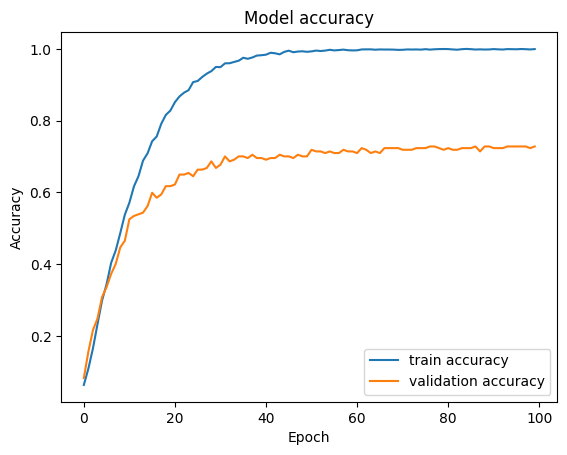

In [10]:
inceptionV3_wrapper.plot_accuracy()

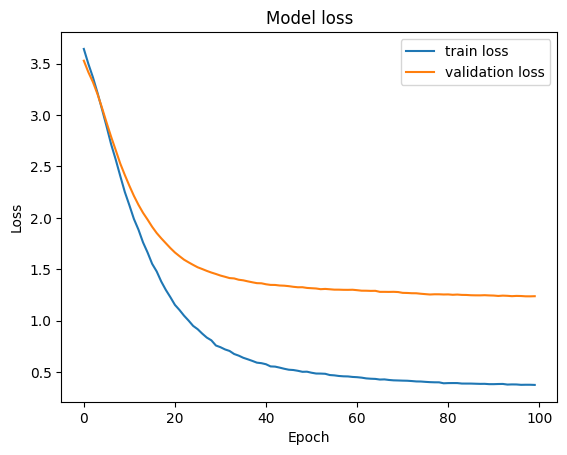

In [11]:
inceptionV3_wrapper.plot_loss()

In [12]:
inceptionV3_wrapper.load_model()

Loading model from "../../artifacts/models/InceptionV3.h5"...
Model loaded successfully!


20/20 [==============================] - 1s 31ms/step - loss: 1.0788 - accuracy: 0.7916
Loss: 1.0788
Accuracy: 0.7916
20/20 [==============================] - 1s 20ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       0.84      0.64      0.73        25
           2       0.80      0.87      0.83        52
           3       0.90      0.92      0.91        38
           4       0.74      0.74      0.74        27
           5       0.60      0.86      0.71        35
           6       0.73      0.71      0.72        45
           7       0.75      0.90      0.82        10
           8       0.92      0.92      0.92        12
           9       0.71      0.45      0.56        11
          10       0.93      0.61      0.74        23
          11       0.76      0.96      0.85        26
          12       0.69      0.75      0.72        32
          13       0.86      0.80      0.83     

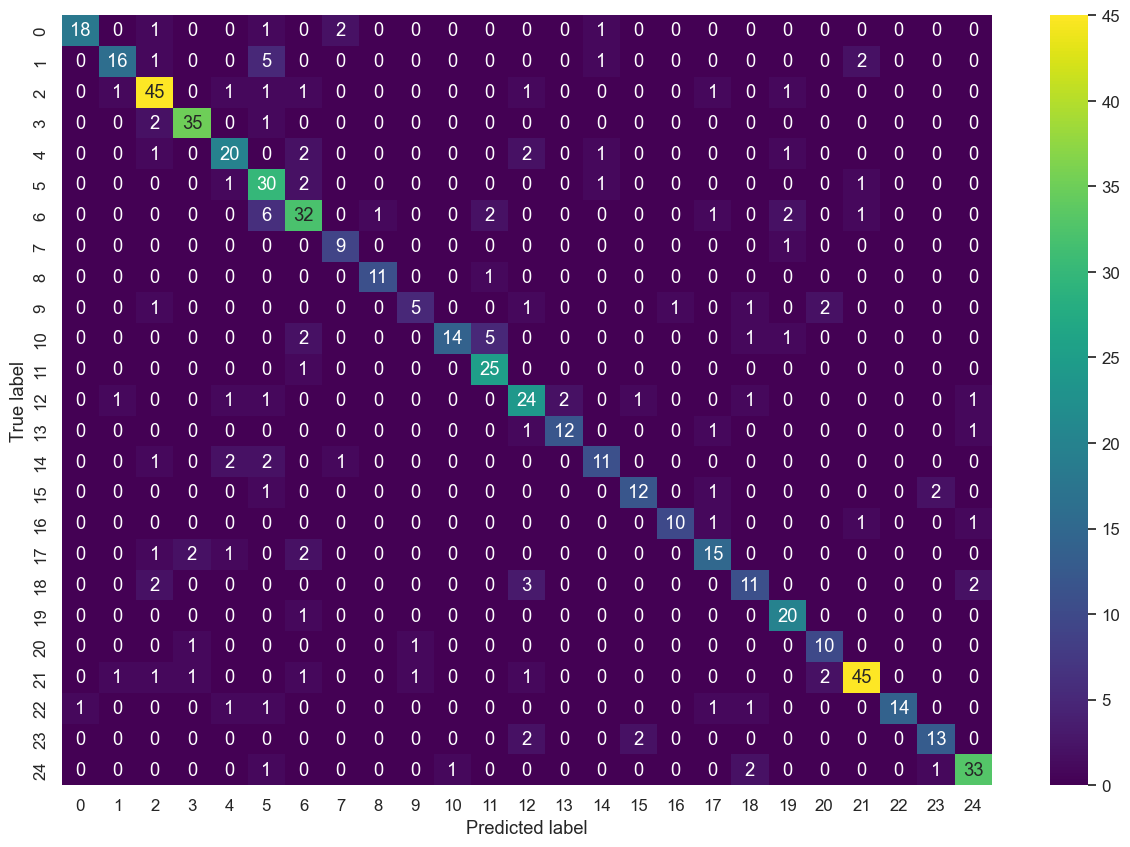

In [13]:
inceptionV3_wrapper.display_evaluation_results()